## Authors of the document
### This file was mainly written by Simon Erlandsson, with Nikhil Challa as team member.

Some code in the beginning of the file was re-used from before the group split,
their respective authors are listed in the Git README.

In [1]:
from tensorflow import keras
import tensorflow as tf
import numpy as np
from pathlib import Path
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection

2022-12-08 17:32:33.312325: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-08 17:32:33.312343: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
path = Path("../datasets/Images_Transformed_565_160_120")
with open(path/'data.npy', 'rb') as d, open(path/"labels.npy", "rb") as l, open(path/"classes.npy", "rb") as c:
    data = np.load(d)
    labels = np.load(l)
    classes = np.load(c)
le = LabelEncoder()
le.classes_ = classes

In [3]:
print(labels.shape)
print(data.shape)
print(classes)

(130,)
(130, 120, 160, 3)
['Maria' 'Nikhil' 'Simon']


In [4]:
from collections import Counter
print(Counter(labels))

Counter({2: 49, 0: 45, 1: 36})


In [5]:
# Helper functions
def _565_channels_normalize(data: np.ndarray) -> np.ndarray:
    width, height, chan = data.shape
    channels = np.zeros(shape=(width, height, chan), dtype=np.float16)

    for x in range(width):
        for y in range(height):
            channels[x, y, 0] = data[x, y, 0] / 32
            channels[x, y, 1] = data[x, y, 1] / 64
            channels[x, y, 2] = data[x, y, 2] / 32

    return channels

# If we want to reverse the normalization -> 888
def normalized_to_888(data: np.ndarray) -> np.ndarray:
    width, height, chan = data.shape
    channels = np.zeros(shape=(width, height, chan), dtype=np.uint16)

    for x in range(width):
        for y in range(height):
            channels[x, y, 0] = data[x, y, 0] * 255
            channels[x, y, 1] = data[x, y, 1] * 255
            channels[x, y, 2] = data[x, y, 2] * 255

    return channels

In [6]:
# Normalize 565 channels
unscaled_data = data

data = []
for img in unscaled_data:
    data.append(_565_channels_normalize(img))
data = np.array(data)


In [7]:
train_data, validation_data, train_labels, validation_labels = model_selection.train_test_split(data,labels, random_state=50,test_size=0.3)
validation_data, test_data, validation_labels, test_labels = model_selection.train_test_split(validation_data,validation_labels, random_state=50,test_size=0.3)

print('train data shape:',np.shape(train_data))
print('validation data shape:',np.shape(validation_data))
print('train labels shape:',np.shape(train_labels))
print('validation labels shape:',np.shape(validation_labels))
print('test labels shape:',np.shape(test_data))
print('test labels shape:',np.shape(test_labels))

train data shape: (91, 120, 160, 3)
validation data shape: (27, 120, 160, 3)
train labels shape: (91,)
validation labels shape: (27,)
test labels shape: (12, 120, 160, 3)
test labels shape: (12,)


In [8]:
mean = np.mean(train_data, axis = 0)
std = np.std(train_data, axis = 0)

#train_data = (train_data-mean) / std
#validation_data = (validation_data-mean) / std

print(train_data)

[[[[0.8438  0.8594  0.8125 ]
   [0.875   0.8594  0.8125 ]
   [0.875   0.875   0.8125 ]
   ...
   [0.8438  0.797   0.75   ]
   [0.8125  0.797   0.7188 ]
   [0.8438  0.8125  0.7188 ]]

  [[0.8438  0.828   0.6875 ]
   [0.875   0.8438  0.7188 ]
   [0.9062  0.875   0.7188 ]
   ...
   [0.8125  0.7656  0.625  ]
   [0.7812  0.7656  0.625  ]
   [0.8125  0.797   0.6562 ]]

  [[0.8438  0.8438  0.7188 ]
   [0.875   0.8594  0.7188 ]
   [0.875   0.875   0.75   ]
   ...
   [0.8125  0.7812  0.6562 ]
   [0.8125  0.7656  0.6562 ]
   [0.8125  0.8125  0.6562 ]]

  ...

  [[0.2188  0.3281  0.2812 ]
   [0.25    0.3438  0.3125 ]
   [0.2812  0.3594  0.3125 ]
   ...
   [0.9062  0.8594  0.7188 ]
   [0.875   0.828   0.6875 ]
   [0.875   0.8438  0.6875 ]]

  [[0.2188  0.2969  0.2812 ]
   [0.25    0.3438  0.3125 ]
   [0.2812  0.3594  0.3125 ]
   ...
   [0.875   0.8594  0.7188 ]
   [0.875   0.828   0.6875 ]
   [0.875   0.8594  0.6875 ]]

  [[0.2188  0.3125  0.2812 ]
   [0.2812  0.3594  0.3125 ]
   [0.2812  0.375   

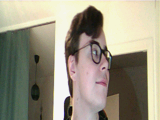

In [9]:
keras.utils.array_to_img(train_data[0])

In [10]:
classes_txt = classes
classes = len(le.classes_)
classes

3

In [13]:
import gc
gc.collect() # used to clear gpu memory 

16

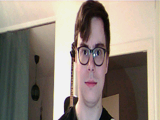

In [14]:
keras.utils.array_to_img(validation_data[0])

In [15]:
img_axis = validation_data[0][None,:,:,:]
img_axis.shape

(1, 120, 160, 3)

# The FINAL model
Below is the model which will be used in the Final product. Please try to increase the score.

In [61]:
model_final = keras.models.Sequential([
    keras.layers.Input(shape=train_data.shape[1:]),
    #keras.layers.MaxPool2D((2,2), input_shape=train_data.shape[1:]),
    #keras.layers.Dropout(0.5),
    keras.layers.Conv2D(8, (3,3), activation="relu"),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(16, (2,2), activation="relu"),
    keras.layers.MaxPool2D((3,3)),
    keras.layers.Conv2D(8, (3,3), activation="relu"),
    keras.layers.MaxPool2D((3,3)),
    #keras.layers.Conv2D(32, (3,3), activation="relu"),
    #keras.layers.MaxPool2D((2,2)),
    #keras.layers.Conv2D(32, (3,3), activation="relu"),
    #keras.layers.MaxPool2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(75, activation="relu"),
    keras.layers.Dropout(0.2),

    ## Dynamic
    keras.layers.Dense(35, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(classes, activation="softmax")
    ])

model_final.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_final.summary()

# Fill in the number of dynamic layers in the model
cnt_dynamic_layers = 3

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 118, 158, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 39, 52, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 38, 51, 16)        528       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 17, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 15, 8)         1160      
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 3, 5, 8)         

In [62]:
history_final = model_final.fit(train_data, train_labels, validation_data=(validation_data, validation_labels), batch_size=32, epochs=50)#, callbacks=[callback])

Epoch 1/50
3/3 [==============================] - 1s 110ms/step - loss: 1.0882 - accuracy: 0.4286 - val_loss: 1.0678 - val_accuracy: 0.4444
Epoch 2/50
3/3 [==============================] - 0s 57ms/step - loss: 1.0820 - accuracy: 0.3846 - val_loss: 1.0505 - val_accuracy: 0.3704
Epoch 3/50
3/3 [==============================] - 0s 56ms/step - loss: 1.0769 - accuracy: 0.3297 - val_loss: 1.0388 - val_accuracy: 0.3704
Epoch 4/50
3/3 [==============================] - 0s 56ms/step - loss: 1.0705 - accuracy: 0.4176 - val_loss: 1.0306 - val_accuracy: 0.4815
Epoch 5/50
3/3 [==============================] - 0s 55ms/step - loss: 1.0399 - accuracy: 0.4505 - val_loss: 1.0112 - val_accuracy: 0.5926
Epoch 6/50
3/3 [==============================] - 0s 56ms/step - loss: 1.0328 - accuracy: 0.5055 - val_loss: 0.9878 - val_accuracy: 0.7407
Epoch 7/50
3/3 [==============================] - 0s 56ms/step - loss: 1.0180 - accuracy: 0.5165 - val_loss: 0.9559 - val_accuracy: 0.7407
Epoch 8/50
3/3 [==========

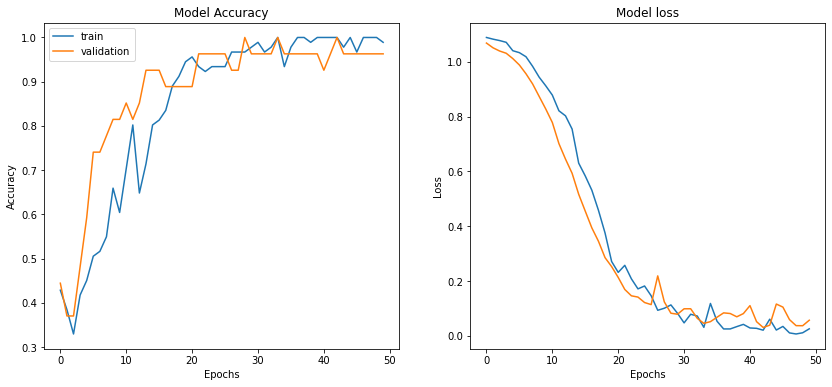

In [63]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(history_final.history['accuracy'], label='train')
plt.plot(history_final.history['val_accuracy'], label='validation')
plt.legend()

plt.subplot(1,2,2)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.plot(history_final.history['loss'], label="train")
plt.plot(history_final.history['val_loss'], label="validation")

In [64]:
model_final.save("model_final")

INFO:tensorflow:Assets written to: model_final/assets


Test acc: 0.9166666666666666
Is: Maria but was predicted as: Nikhil


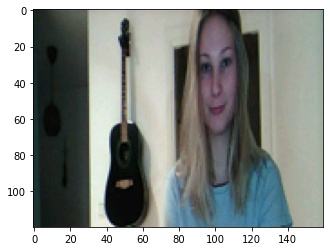

In [65]:
y_pred_class = model_final.predict(test_data)
y_pred_class = np.argmax(np.array(y_pred_class), axis=1)

y_diff = y_pred_class != test_labels
print("Test acc:", 1 - y_diff.sum() / len(y_diff))

y_pred_txt = []
y_true_txt = []

for i in range(len(test_labels)):
    y_pred_txt.append(classes_txt[y_pred_class[i]])
    y_true_txt.append(classes_txt[test_labels[i]])

for i in range(len(y_diff)):
    if y_diff[i]:
        plt.imshow(keras.utils.array_to_img(test_data[i]))
        print("Is:", y_true_txt[i], "but was predicted as:", y_pred_txt[i])

# Fix CNN weights and train only DNN (dynamic weights)

### CNN prediction

In [66]:
model = keras.models.load_model('model_final')

# cnt_dynamic_layers is defined above
# remove last "cnt_dynamic_layers" layers

x = model.layers[-(cnt_dynamic_layers + 1)].output 

model = keras.Model(inputs = model.input, outputs = x)
model.summary()

# output contains input vector to DNN
cnn_pred_train = model.predict(train_data) 
cnn_pred_validation = model.predict(validation_data) # need to transform validation to input vector for DNN
cnn_pred_test = model.predict(test_data) # perhaps merge with validation for Arduino

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 120, 160, 3)]     0         
                                                                 
 conv2d_12 (Conv2D)          (None, 118, 158, 8)       224       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 39, 52, 8)        0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 38, 51, 16)        528       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 12, 17, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_14 (Conv2D)          (None, 10, 15, 8)         1160

### Save predictions to .h-file

In [67]:
# Save output from pretrained model (CNN) to .h, is also used below
def append_photo_data(data, data_cnt, type):
    lines.append("const float cnn_" + type + "_data[" + str(data_cnt) + "][" + str(first_layer_input_cnt) + "] = {")
    frames_str = []
    for frame in data:
        frame_values = [str(i) for i in frame]
        frames_str.append("  {" + ", ".join(frame_values) + "}")
    lines.append(",\n".join(frames_str))
    lines.append("};")
    lines.append("")

def append_label_data(data, data_cnt, type):
    lines.append("const int " + type + "_labels[" + str(data_cnt) + "] = {")
    labels_str = [str(i) for i in data]
    lines.append("  " + ", ".join(labels_str))
    lines.append("};")
    lines.append("")

def append_class_data(data, data_cnt):
    lines.append("const char* classes[" + str(data_cnt) + "] = {")
    classes_str = ['"' + str(i) + '"' for i in data]
    lines.append("  " + ", ".join(classes_str))
    lines.append("};")
    lines.append("")

PRINT, SAVE = 0, 1
PRINT_OR_SAVE = SAVE

arduino_validation_data = np.concatenate((cnn_pred_validation, cnn_pred_test))
arduino_validation_labels = np.concatenate((validation_labels, test_labels))

first_layer_input_cnt = len(cnn_pred_train[0])
train_data_cnt = len(train_labels)
validation_data_cnt = len(arduino_validation_labels)
classes_cnt = classes

if PRINT_OR_SAVE == PRINT:
    print("Label translations:", classes_txt)
    print("Number of inputs for first DNN layer:", first_layer_input_cnt)
    print("Sample size train data:", train_data_cnt)
    print("Sample size validation data:", validation_data_cnt)
    print("Number of classes:", classes_cnt)

    for i in range(train_data_cnt):
        print("Training Photo:", str(i), "has label:", str(train_labels[i]))
        print(cnn_pred_train[i])

    for i in range(validation_data_cnt):
        print("Validation Photo:", str(i), "has label:", str(arduino_validation_labels[i]))
        print(arduino_validation_data[i])

elif PRINT_OR_SAVE == SAVE:
    lines = []
    lines.append("// Data file containing output from CNN as input to DNN")
    lines.append("// This file was automatically generated using 'tensorflow_main.ipynb'")
    lines.append("const int first_layer_input_cnt = " + str(first_layer_input_cnt) + ";")
    lines.append("const int train_data_cnt = " + str(train_data_cnt) + ";")
    lines.append("const int validation_data_cnt = " + str(validation_data_cnt) + ";")
    lines.append("const int classes_cnt = " + str(classes_cnt) + ";")
    lines.append("")

    append_class_data(classes_txt, classes_cnt)

    # Training labels
    append_label_data(train_labels, train_data_cnt, "train")

    # Validation labels
    append_label_data(arduino_validation_labels, validation_data_cnt, "validation")

    # Training data
    append_photo_data(cnn_pred_train, train_data_cnt, "train")

    # Validation data
    append_photo_data(arduino_validation_data, validation_data_cnt, "validation")

    f = open("cnn_data.h", "w")
    f.write("\n".join(lines))
    f.close()

    # Chunking: for row in [frame[i:i+12] for i in range(0, len(frame), 12)]:


### Python simulation of DNN learning
We now train only the DNN part with the same structure (although zero the weights) as the DNN part above. The CNN part is frozen, i.e. using the predictions for the DNN input layer obtained above.
#### Create DNN model

In [74]:
# Creating the DNN model, by extracting part from above
model_final_copy = tf.keras.models.clone_model(model_final)

in_layer = model_final_copy.layers[-(cnt_dynamic_layers + 1)].output
out_layer = model_final_copy.layers[-1].output 

dnn_model = keras.Model(inputs = in_layer, outputs = out_layer)
dnn_model.summary()
dnn_model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

#dnn_pred_train = dnn_model.predict(cnn_pred_train)
#print(dnn_pred_train)

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 75)]              0         
                                                                 
 dense_17 (Dense)            (None, 35)                2660      
                                                                 
 dense_18 (Dense)            (None, 15)                540       
                                                                 
 dense_19 (Dense)            (None, 3)                 48        
                                                                 
Total params: 3,248
Trainable params: 3,248
Non-trainable params: 0
_________________________________________________________________


### Evauluate the non-trained DNN model

In [75]:
def print_dnn_accuracy(input, labels, name, verbose=False):
    y_pred_class = dnn_model.predict(input)
    y_pred_class = np.argmax(np.array(y_pred_class), axis=1)

    y_diff = y_pred_class != labels
    print(name, "acc:", 1 - y_diff.sum() / len(y_diff))

    y_pred_txt = []
    y_true_txt = []

    for i in range(len(input)):
        y_pred_txt.append(classes_txt[y_pred_class[i]])
        y_true_txt.append(classes_txt[labels[i]])

    for i in range(len(y_diff)):
        if y_diff[i] and verbose:
            #plt.imshow(keras.utils.array_to_img(input[i]))
            print(" Is:", y_true_txt[i], "but was predicted as:", y_pred_txt[i])

print_dnn_accuracy(cnn_pred_train, train_labels, "Train")
print_dnn_accuracy(cnn_pred_validation, validation_labels, "Validation")
print_dnn_accuracy(cnn_pred_test, test_labels, "Test")

Train acc: 0.3846153846153846
Validation acc: 0.37037037037037035
Test acc: 0.33333333333333337


### Train DNN part
Now use train_data to only train DNN.

In [76]:
history_dnn = dnn_model.fit(cnn_pred_train, train_labels, validation_data=(cnn_pred_validation, validation_labels), batch_size=5, epochs=10)

Epoch 1/10
19/19 [==============================] - 0s 6ms/step - loss: 1.0639 - accuracy: 0.6264 - val_loss: 0.3340 - val_accuracy: 0.9259
Epoch 2/10
19/19 [==============================] - 0s 2ms/step - loss: 0.2878 - accuracy: 0.9231 - val_loss: 0.2019 - val_accuracy: 0.9630
Epoch 3/10
19/19 [==============================] - 0s 2ms/step - loss: 0.1491 - accuracy: 0.9890 - val_loss: 0.1362 - val_accuracy: 0.9630
Epoch 4/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0883 - accuracy: 0.9890 - val_loss: 0.1233 - val_accuracy: 0.9630
Epoch 5/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0530 - accuracy: 1.0000 - val_loss: 0.0995 - val_accuracy: 0.9259
Epoch 6/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0399 - accuracy: 0.9890 - val_loss: 0.0979 - val_accuracy: 0.9630
Epoch 7/10
19/19 [==============================] - 0s 2ms/step - loss: 0.0208 - accuracy: 1.0000 - val_loss: 0.1191 - val_accuracy: 0.9630
Epoch 8/10
19/19 [==

### Evaluation trained DNN model
Evaluation, excatly the same as above, but DNN model is now trained.

In [77]:
print_dnn_accuracy(cnn_pred_train, train_labels, "Train", True)
print_dnn_accuracy(cnn_pred_validation, validation_labels, "Validation", True)
print_dnn_accuracy(cnn_pred_test, test_labels, "Test", True)

Train acc: 1.0
Validation acc: 0.962962962962963
 Is: Simon but was predicted as: Maria
Test acc: 0.9166666666666666
 Is: Maria but was predicted as: Nikhil
